## ANN을 돌려보자


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import scale


# Lab 10 MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random

from tensorflow.contrib.data.python.ops import sliding




In [2]:
xx = pd.read_csv("E:\\Dropbox\\2017\\06.job_recruitment\\01.Lpoint\\01.Data\\03.XXYY\\xx.csv")
# xx = xx.iloc[:,1:]
xx.head()
xx.shape

(183, 20)

In [3]:
yy = pd.read_csv("E:\\Dropbox\\2017\\06.job_recruitment\\01.Lpoint\\01.Data\\03.XXYY\\yy.csv")
# yy = yy.iloc[:,1:]
yy.head()

,Unnamed: 0,x
0,1,191
1,2,162
2,3,150
3,4,177
4,5,163


In [4]:
# xy = xy.iloc[:,:]
# xy.head()

x = xx.iloc[:,1:6] # indirect_search, indirect buy, naver, temperatue, community_pca만 사용하자. 
y = yy.iloc[:,[1]]

In [5]:
# print(x,y)
x.shape
x.head()

,Indirect_Search,Indirect_Buy,Naver,Temperature,Community_PC
0,78.482008,270.087616,60,15.6,53.109166
1,61.568236,225.181314,56,18.4,51.014285
2,72.800687,216.125653,55,17.8,48.977316
3,77.364109,216.669607,54,13.4,36.112232
4,68.124362,193.471576,52,7.6,40.239222


In [6]:

tf.set_random_seed(777)  # reproducibility

seq_length = 7
data_dim = 5

# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 1000
batch_size = 7
keep_prob = 0.7

# now forecast 
trainX = x.iloc[7:153,:]
trainY = y.iloc[:146,[0]]
testX = x.iloc[160:,:]
testY = y.iloc[153:-7,[0]]

# forecast tomorrow
# trainX = x.iloc[:152,1:]
# trainY = y.iloc[1:153,[0]]
# testX = x.iloc[152:-1,1:]
# testY = y.iloc[153:,[0]]
# 
# len(trainY)
testY.shape

(23, 1)

In [7]:
# input place holders
# tf.reset_default_graph()
# X = tf.placeholder(tf.float32, [None, 7])
# Y = tf.placeholder(tf.float32, [None, 7])
# train_mode = tf.placeholder(tf.bool, name='train_mode')

tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])
train_mode = tf.placeholder(tf.bool, name='train_mode')

# layer output size
hidden_output_size = 5
final_output_size = 1

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

W1 = tf.get_variable("W1", shape=[data_dim, 5],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([5]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[5, 5],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([5]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[5, 5],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([5]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[5, 5],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([5]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[5, 1],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([1]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=hypothesis, labels=Y))
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
loss = tf.reduce_sum(tf.square(hypothesis - Y))  # sum of the squares
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
# train = optimizer.minimize(loss)

targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))


[Epoch:    1] cost = 2662074.0 rmse :118.74961853027344 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


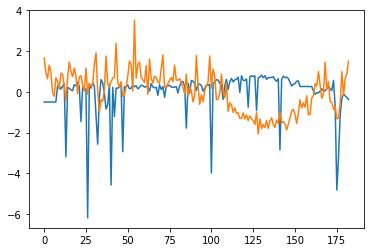

[Epoch:  101] cost = 124370.555 rmse :54.978721618652344 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


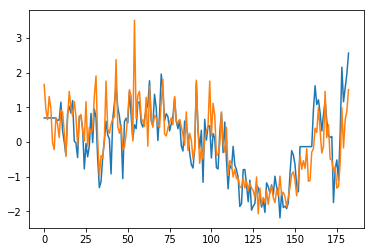

[Epoch:  201] cost = 115407.75 rmse :55.856693267822266 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


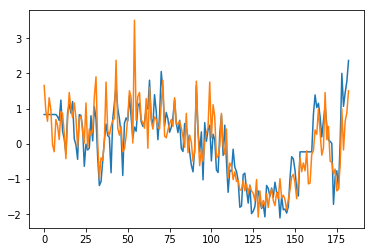

[Epoch:  301] cost = 108212.719 rmse :55.90837860107422 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


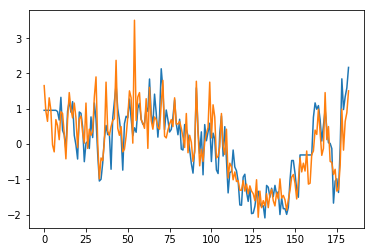

[Epoch:  401] cost = 103322.617 rmse :55.68272018432617 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


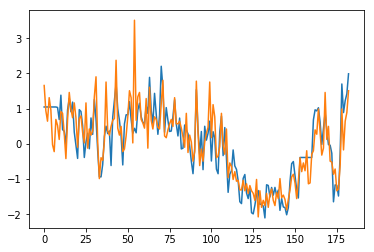

[Epoch:  501] cost = 100248.625 rmse :55.058860778808594 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


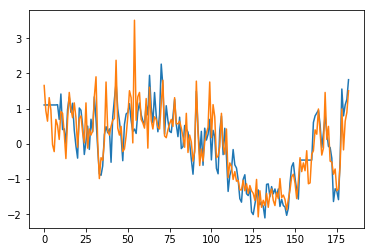

[Epoch:  601] cost = 98253.7734 rmse :54.22858428955078 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


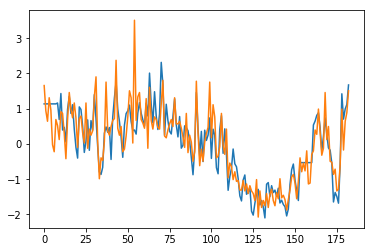

[Epoch:  701] cost = 96925.4922 rmse :53.43210220336914 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


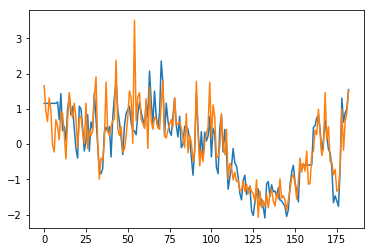

[Epoch:  801] cost = 96063.0703 rmse :52.77448654174805 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


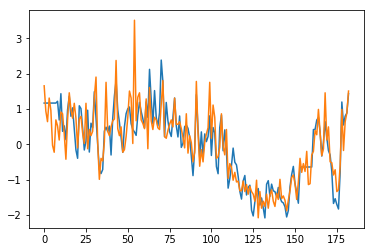

[Epoch:  901] cost = 95530.4609 rmse :52.262332916259766 


C:\Users\Yerim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


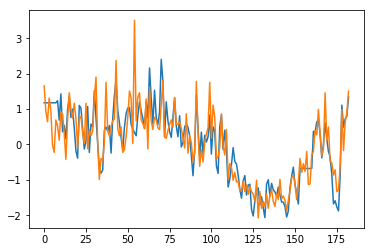

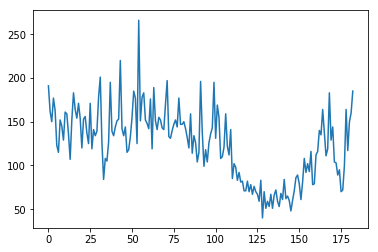

In [9]:

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
#     total_batch = int(len(trainX) / batch_size)
#     for i in range(total_batch):
#         batch_xs, batch_ys = trainX, trainY
    feed_dict_train = {X: trainX, Y: trainY}
    feed_dict_cost = {X: trainX, Y: trainY}
    opt = sess.run(optimizer, feed_dict=feed_dict_train)
    c = sess.run(loss, feed_dict=feed_dict_cost)
    avg_cost =c
    test_predict = sess.run(hypothesis, feed_dict={X: testX})
    train_predict = sess.run(hypothesis, feed_dict={X: trainX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    if epoch%100 ==0 :
        print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost), 'rmse :{} '.format(rmse_val))
        plt.plot(scale([x for x in np.repeat(train_predict[0],7)]+ 
                       [x for x in train_predict]+
                       [x for x in np.repeat(test_predict[0],7)]+
                       [x for x in test_predict]))
        plt.plot(scale(y))
        plt.show()
plt.plot(yy.iloc[:,[1]])
    